In [1]:
import numpy as np
import pandas as pd
np.random.seed(123)

# viz
import matplotlib.pyplot as plt

# notebook settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)

## Sample Prep

In [2]:
samples = pd.read_csv('../data/TCGA/rna-seq_pan/meta/gdc_sample_sheet.2019-12-12.tsv', sep="\t")
# get file type
samples['data'] = [val[1] for i,val in samples['File Name'].str.split(".").items()]
samples.head()

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type,data
0,754774dd-77e1-4cf5-b9b5-3afad9f41410,999edb9e-8a45-4115-84d5-fca75dcfa639.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-E2-A1IG,TCGA-E2-A1IG-01A,Primary Tumor,FPKM
1,8bf102b9-baf7-4749-bcd0-eca25f600722,23393a6a-bfbc-4dec-9ab5-e78a487a095f.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-EW-A1J5,TCGA-EW-A1J5-01A,Primary Tumor,FPKM
2,5bf7609e-68cb-4ddb-8f05-ee1d4f92cf9b,4a9bb3fd-4e75-4585-82f7-7254889b9838.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-BRCA,TCGA-AR-A1AU,TCGA-AR-A1AU-01A,Primary Tumor,FPKM
3,10a40ceb-080c-4758-97f9-1a262e2639ed,9858d286-1b96-4414-bd09-d73dc6f1c79e.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LGG,TCGA-DB-A64R,TCGA-DB-A64R-01A,Primary Tumor,FPKM
4,2600ef39-0bdf-4e10-9fdf-e3dbed7b5383,f7182de7-067e-467b-af88-790ad3e63eec.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LGG,TCGA-P5-A77X,TCGA-P5-A77X-01A,Primary Tumor,FPKM


Samples with RNAseq adjacent normal tissue

In [3]:
samples[samples['Sample Type']=='Solid Tissue Normal']['data'].value_counts()

FPKM    636
Name: data, dtype: int64

In [4]:
samples['project'] = [val[1] for i,val in samples['Project ID'].str.split("-").items()]
samples['project'].value_counts()

BRCA    1206
LUAD     588
UCEC     567
KIRC     554
LUSC     543
LGG      524
PRAD     517
COAD     506
THCA     505
SKCM     469
BLCA     431
LIHC     421
STAD     402
OV       379
KIRP     308
CESC     306
PAAD     171
ESCA     171
GBM      166
TGCT     150
PCPG     133
LAML     123
KICH      81
ACC       75
CHOL      41
SARC      10
DLBC       9
READ       7
MESO       1
Name: project, dtype: int64

In [5]:
# all cases with adjacent normal tissue
cases = samples[samples['Sample Type']=='Solid Tissue Normal']['Case ID']

In [6]:
samples[(samples['Case ID'].isin(cases))]['project'].value_counts()

BRCA    231
KIRC    140
LUAD    124
THCA    106
PRAD    102
LIHC     98
LUSC     94
COAD     83
KIRP     61
STAD     59
KICH     45
UCEC     44
BLCA     40
ESCA     19
CHOL     16
PAAD      8
CESC      6
PCPG      6
SKCM      2
READ      2
Name: project, dtype: int64

In [7]:
samples[(samples['Case ID'].isin(cases))].groupby(['project', 'Sample Type']).size()

project  Sample Type        
BLCA     Primary Tumor           21
         Solid Tissue Normal     19
BRCA     Metastatic               3
         Primary Tumor          116
         Solid Tissue Normal    112
CESC     Primary Tumor            3
         Solid Tissue Normal      3
CHOL     Primary Tumor            8
         Solid Tissue Normal      8
COAD     Primary Tumor           44
         Solid Tissue Normal     39
ESCA     Primary Tumor            8
         Solid Tissue Normal     11
KICH     Primary Tumor           22
         Solid Tissue Normal     23
KIRC     Primary Tumor           70
         Solid Tissue Normal     70
KIRP     Primary Tumor           30
         Solid Tissue Normal     31
LIHC     Primary Tumor           49
         Solid Tissue Normal     49
LUAD     Primary Tumor           66
         Solid Tissue Normal     58
LUSC     Primary Tumor           47
         Solid Tissue Normal     47
PAAD     Primary Tumor            4
         Solid Tissue Normal      4

In [8]:
samples['Case ID'].nunique()

8596

In [9]:
# disparity in cases
samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Primary Tumor') 
        & (samples['data']=='FPKM') & (samples['project']=='BRCA')]['Case ID'].nunique()
samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Solid Tissue Normal') 
        & (samples['data']=='FPKM') & (samples['project']=='BRCA')]['Case ID'].nunique()

111

112

In [10]:
# divide, join, subset
case_tumor = samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Primary Tumor') & 
                     (samples['data']=='FPKM') & (samples['project']=='BRCA')]
case_norm = samples[(samples['Case ID'].isin(cases)) & (samples['Sample Type']=='Solid Tissue Normal') & 
                    (samples['data']=='FPKM') & (samples['project']=='BRCA')]
# get unique case ID for matched normal and tumor tissue
cases = case_norm[case_norm['Case ID'].isin(case_tumor['Case ID'])]['Case ID']
cases.shape

(111,)

In [11]:
case_tumor = case_tumor[case_tumor['Case ID'].isin(cases)]
case_norm = case_norm[case_norm['Case ID'].isin(cases)]
cases = pd.concat([case_tumor, case_norm])

In [12]:
case_tumor.shape
case_norm.shape
cases.shape

(116, 10)

(111, 10)

(227, 10)

In [13]:
case_tumor['Case ID'].value_counts()

TCGA-A7-A0DB    3
TCGA-A7-A13E    3
TCGA-A7-A0DC    2
TCGA-BH-A0BT    1
TCGA-BH-A1FU    1
               ..
TCGA-BH-A0BM    1
TCGA-E2-A1BC    1
TCGA-BH-A1F6    1
TCGA-BH-A1FE    1
TCGA-E2-A15M    1
Name: Case ID, Length: 111, dtype: int64

In [14]:
case_tumor['Case ID'].value_counts()

TCGA-A7-A0DB    3
TCGA-A7-A13E    3
TCGA-A7-A0DC    2
TCGA-BH-A0BT    1
TCGA-BH-A1FU    1
               ..
TCGA-BH-A0BM    1
TCGA-E2-A1BC    1
TCGA-BH-A1F6    1
TCGA-BH-A1FE    1
TCGA-E2-A15M    1
Name: Case ID, Length: 111, dtype: int64

## Dataset Prep

In [15]:
from sklearn.model_selection import train_test_split

target = 'Sample Type'
cases[target] = cases[target].astype('category')

train, test = train_test_split(cases)
train[target].value_counts()
test[target].value_counts()

Primary Tumor          90
Solid Tissue Normal    80
Name: Sample Type, dtype: int64

Solid Tissue Normal    31
Primary Tumor          26
Name: Sample Type, dtype: int64

In [16]:
import torch
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable
torch.manual_seed(123)

from trainer import fit
import visualization as vis
import numpy as np

cuda = torch.cuda.is_available()
print("Cuda is available: {}".format(cuda))

classes = {key:val for val,key in enumerate(train[target].cat.categories.values)}
classes

Cuda is available: True


{'Primary Tumor': 0, 'Solid Tissue Normal': 1}

In [17]:
from tcga_datasets import TCGA, SiameseTCGA
root_dir = "../data/TCGA/rna-seq_pan/"
batch_size = 1

train_dataset = TCGA(root_dir, samples=train, train=True, target=target)
test_dataset = TCGA(root_dir, samples=test, train=False, target=target)

kwargs = {'num_workers': 10, 'pin_memory': True} if cuda else {'num_workers': 10}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

## Siamese Network

In [18]:
# Step 1 set up dataloader
root_dir = "../data/TCGA"
siamese_train_dataset = SiameseTCGA(train_dataset) # Returns pairs of images and target same/different
siamese_test_dataset = SiameseTCGA(test_dataset)
batch_size = 8
kwargs = {'num_workers': 10, 'pin_memory': True} if cuda else {}
siamese_train_loader = torch.utils.data.DataLoader(siamese_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
siamese_test_loader = torch.utils.data.DataLoader(siamese_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# Set up the network and training parameters
from tcga_networks import EmbeddingNet, SiameseNet
from losses import ContrastiveLoss, OnlineContrastiveLoss
from metrics import AccumulatedAccuracyMetric

# Step 2
embedding_net = EmbeddingNet()
# Step 3
model = SiameseNet(embedding_net)
if cuda:
    model.cuda()
    
# Step 4
margin = 1.
loss_fn = OnlineContrastiveLoss(margin)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 10
# print training metrics every log_interval * batch_size
log_interval = 10

RuntimeError: CUDA out of memory. Tried to allocate 462.00 MiB (GPU 0; 10.76 GiB total capacity; 0 bytes already allocated; 175.56 MiB free; 0 bytes cached)

In [ ]:
train_loss, val_loss = fit(siamese_train_loader, siamese_test_loader, model, loss_fn, optimizer, scheduler, 
    n_epochs, cuda, log_interval)

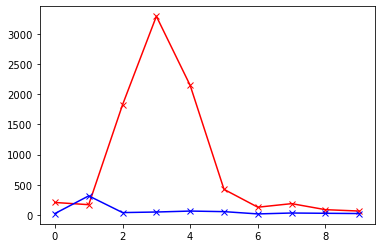

In [26]:
plt.plot(range(0, n_epochs), train_loss, 'rx-')
plt.plot(range(0, n_epochs), val_loss, 'bx-')

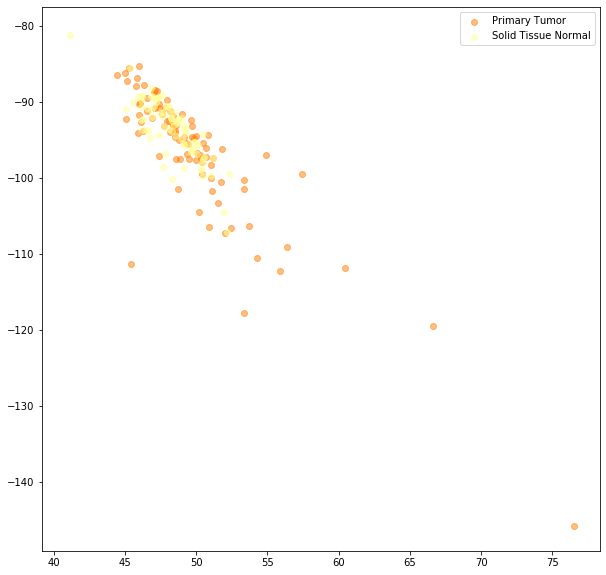

In [27]:
train_embeddings_cl, train_labels_cl = vis.extract_embeddings(train_loader, model)
vis.plot_embeddings(train_embeddings_cl, train_labels_cl, train_dataset.labels_dict.values())

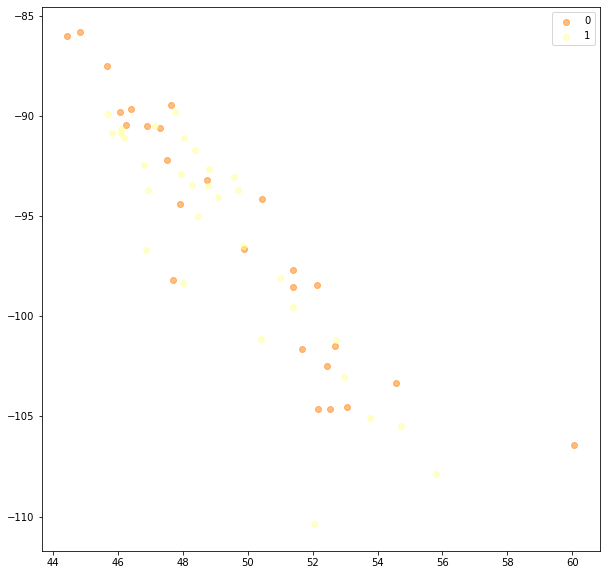

In [28]:
val_embeddings_baseline, val_labels_baseline = vis.extract_embeddings(test_loader, model)
vis.plot_embeddings(val_embeddings_baseline, val_labels_baseline, classes.values())

## Integrated Gradients; single sample POC

In [65]:
import copy
from captum.attr import LayerActivation
from captum.attr import IntegratedGradients

In [66]:
tmp_model = copy.deepcopy(model)

In [67]:
tmp_model

SiameseNet(
  (embedding_net): EmbeddingNet(
    (fc): Sequential(
      (linear1): Linear(in_features=60483, out_features=2000, bias=True)
      (relu1): PReLU(num_parameters=1)
      (linear2): Linear(in_features=2000, out_features=500, bias=True)
      (relu2): PReLU(num_parameters=1)
      (linear3): Linear(in_features=500, out_features=250, bias=True)
      (relu3): PReLU(num_parameters=1)
      (linear4): Linear(in_features=250, out_features=100, bias=True)
      (relu4): PReLU(num_parameters=1)
      (linear5): Linear(in_features=100, out_features=50, bias=True)
      (relu5): PReLU(num_parameters=1)
      (linear6): Linear(in_features=50, out_features=10, bias=True)
      (relu6): PReLU(num_parameters=1)
      (linear7): Linear(in_features=10, out_features=2, bias=True)
    )
  )
)

In [68]:
siamese_test_dataset.test_labels
siamese_test_dataset.label_to_indices
siamese_test_dataset.labels_dict

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

{0: array([ 0,  1,  2,  3,  4,  5,  8,  9, 12, 15, 16, 17, 18, 19, 21, 22, 24,
        27, 31, 32, 34, 35, 36, 37, 40, 42, 43, 46, 47, 48, 49, 52, 55, 56]),
 1: array([ 6,  7, 10, 11, 13, 14, 20, 23, 25, 26, 28, 29, 30, 33, 38, 39, 41,
        44, 45, 50, 51, 53, 54])}

{0: 'Primary Tumor', 1: 'Solid Tissue Normal'}

In [69]:
siamese_test_dataset.test_pairs

[[0, 35, 1],
 [2, 55, 1],
 [4, 40, 1],
 [6, 53, 1],
 [8, 32, 1],
 [10, 7, 1],
 [12, 49, 1],
 [14, 44, 1],
 [16, 17, 1],
 [18, 46, 1],
 [20, 14, 1],
 [22, 34, 1],
 [24, 21, 1],
 [26, 6, 1],
 [28, 13, 1],
 [30, 10, 1],
 [32, 22, 1],
 [34, 52, 1],
 [36, 3, 1],
 [38, 6, 1],
 [40, 17, 1],
 [42, 40, 1],
 [44, 11, 1],
 [46, 18, 1],
 [48, 21, 1],
 [50, 33, 1],
 [52, 36, 1],
 [54, 33, 1],
 [56, 37, 1],
 [1, 51, 0],
 [3, 6, 0],
 [5, 45, 0],
 [7, 24, 0],
 [9, 51, 0],
 [11, 2, 0],
 [13, 1, 0],
 [15, 7, 0],
 [17, 51, 0],
 [19, 54, 0],
 [21, 44, 0],
 [23, 47, 0],
 [25, 8, 0],
 [27, 51, 0],
 [29, 48, 0],
 [31, 29, 0],
 [33, 0, 0],
 [35, 38, 0],
 [37, 45, 0],
 [39, 4, 0],
 [41, 4, 0],
 [43, 38, 0],
 [45, 24, 0],
 [47, 13, 0],
 [49, 39, 0],
 [51, 3, 0],
 [53, 21, 0],
 [55, 30, 0]]

In [38]:
data1, data2, label = tuple(siamese_test_dataset.test_pairs[-1])
data1 = Variable(siamese_test_dataset.test_data[data1], requires_grad=True).cuda().view(1, -1)
data2 = Variable(siamese_test_dataset.test_data[data2], requires_grad=True).cuda().view(1, -1)

45

In [28]:
# specify baseline
baseline = torch.zeros(data1.shape).cuda()

In [29]:
ig = IntegratedGradients(tmp_model.get_embedding)

In [30]:
data1.shape
data2.shape
baseline.shape

torch.Size([1, 60483])

torch.Size([1, 60483])

torch.Size([1, 60483])

In [31]:
attr, delta = ig.attribute(data1, baseline, target=1, return_convergence_delta=True, n_steps=50)
attr = attr.cpu().detach().numpy()

In [32]:
feat_imp = pd.Series(data=attr[0], index=train_dataset.data.columns)

In [33]:
feat_imp.nlargest(20)

0
ENSG00000198938.2     0.174273
ENSG00000198840.2     0.133952
ENSG00000198712.1     0.103434
ENSG00000198727.2     0.088628
ENSG00000198899.2     0.063086
ENSG00000087086.12    0.031786
ENSG00000108821.12    0.029633
ENSG00000177954.10    0.025366
ENSG00000034510.5     0.024112
ENSG00000204287.12    0.021982
ENSG00000019582.13    0.021668
ENSG00000198763.3     0.019050
ENSG00000205542.9     0.014466
ENSG00000168542.11    0.013634
ENSG00000143369.13    0.012636
ENSG00000111341.8     0.011273
ENSG00000159335.14    0.011188
ENSG00000143878.9     0.010348
ENSG00000117984.11    0.009862
ENSG00000248527.1     0.009653
dtype: float32

In [34]:
feat_imp.nlargest(20)

0
ENSG00000198938.2     0.174273
ENSG00000198840.2     0.133952
ENSG00000198712.1     0.103434
ENSG00000198727.2     0.088628
ENSG00000198899.2     0.063086
ENSG00000087086.12    0.031786
ENSG00000108821.12    0.029633
ENSG00000177954.10    0.025366
ENSG00000034510.5     0.024112
ENSG00000204287.12    0.021982
ENSG00000019582.13    0.021668
ENSG00000198763.3     0.019050
ENSG00000205542.9     0.014466
ENSG00000168542.11    0.013634
ENSG00000143369.13    0.012636
ENSG00000111341.8     0.011273
ENSG00000159335.14    0.011188
ENSG00000143878.9     0.010348
ENSG00000117984.11    0.009862
ENSG00000248527.1     0.009653
dtype: float32

### All tumor samples; avg feature attribution

In [35]:
classes
tumor_test_idx = siamese_test_dataset.label_to_indices[classes['Primary Tumor']]
tumor_test = Variable(siamese_test_dataset.test_data[tumor_test_idx], requires_grad=True).cuda()

{0: 'Primary Tumor', 1: 'Solid Tissue Normal'}

KeyError: 'Primary Tumor'

In [ ]:
tumor_test.requires_grad

In [ ]:
attr, delta = ig.attribute(tumor_test ,target=0, return_convergence_delta=True)
attr = attr.cpu().detach().numpy()

In [ ]:
attr.shape
feat_imp = pd.DataFrame(data=attr.mean(axis=0), index=train_dataset.data.columns, columns=['Attribution'])
feat_imp.hist(bins=100)
feat_imp.describe()
feat_imp.nlargest(10, columns='Attribution')

In [ ]:
id_map = pd.read_csv("/srv/home/wconnell/keiser/data/uniprot_mapping_ids/map_ensembl_uniprot.csv").set_index(['ENSEMBL_ID'])
id_map.head()

In [ ]:
feat_imp.index = [ens[0] for ens in feat_imp.index.str.split(".")]
feat_imp.nlargest(50, columns='Attribution')
feat_imp = pd.merge(feat_imp, id_map, left_index=True, right_index=True, how='inner')

In [ ]:
feat_imp[feat_imp['UNIPROT_ID']=='P53_HUMAN']
feat_imp[feat_imp['UNIPROT_ID']=='BRCA1_HUMAN']